### 工作進度  
* 【置頂】**新的筆記內容架構**與**量化技術分析系統**相關資訊請參閱[250801筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/250801%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  
* 檢討：觀察股與個股解盤  
  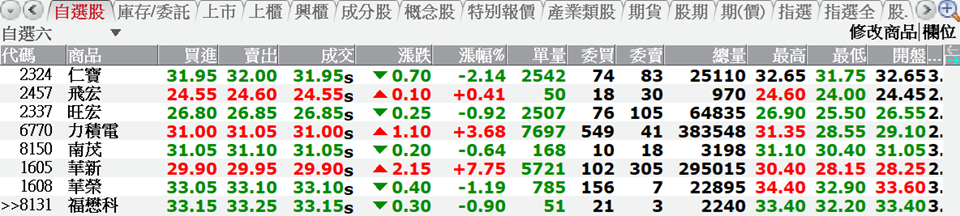  
  - 觀察股是否要將股票老師的觀察全數列入？  
  - 什麼條件的觀察股才會轉入個股解盤？個股解盤要解幾檔個股？    
* 本日「K線追擊週報」LINE群組資訊：[楊忠憲K線追擊週報_251008日報.docx]()。  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
import base64
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [3]:
mysys.UpdatestockDatabase()

2025-10-08 20:57:46.450 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockInfo, data_id: 


##### 更新台股總覽 #####
修改股票資訊。代碼 ＝ 6141：股票名稱 ＝ 柏承，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 6155：股票名稱 ＝ 鈞寶，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 6176：股票名稱 ＝ 瑞儀，產業類別 ＝ 光電業，類型 ＝ twse
修改股票資訊。代碼 ＝ 6183：股票名稱 ＝ 關貿，產業類別 ＝ 資訊服務業，類型 ＝ twse
修改股票資訊。代碼 ＝ 6196：股票名稱 ＝ 帆宣，產業類別 ＝ 其他電子業，類型 ＝ twse
修改股票資訊。代碼 ＝ 6197：股票名稱 ＝ 佳必琪，產業類別 ＝ 電子工業，類型 ＝ twse
##### 更新技術分析資料 #####


2025-10-08 20:58:15.879 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-10-08 20:58:21.670 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-10-08 20:58:51.024 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-10-08 20:58:56.041 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-10-08 20:59:24.466 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-10-08 20:59:29.663 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-10-08 20:59:34.667 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-10-08 21:00:00.580 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-10-08 21:00:05.662 | INFO     | FinMind.data.finmind_api:get_data:155 - download Ta

日K：2025-10-08


* 建立「解盤」物件    

In [4]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **盤後**：量化技術分析  

解盤內容：


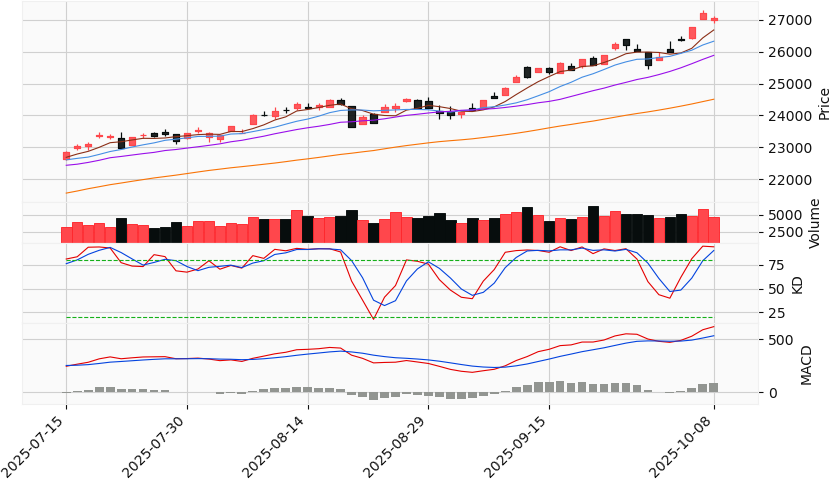

In [5]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數   

> **盤後**：量化技術分析  

解盤內容：


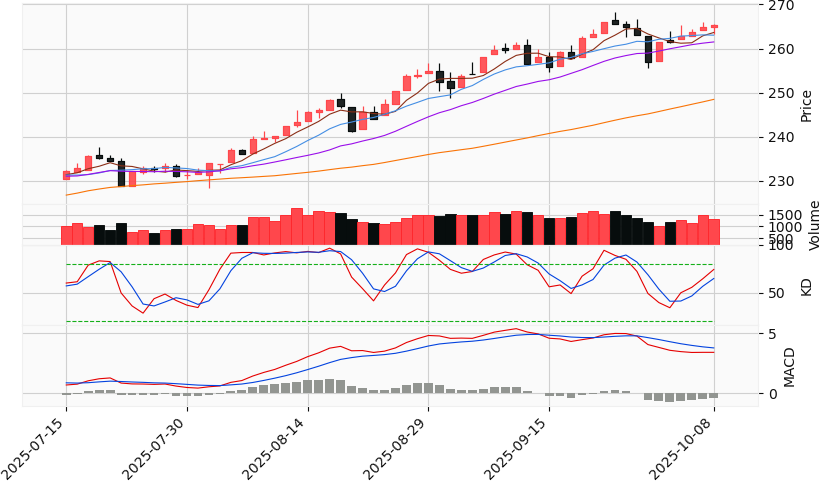

In [6]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股解盤  

* 盟立(2464)  
  看法：短線弱勢，中期支撐暫時有守。  

> **盤後**：量化技術分析  

解盤內容：


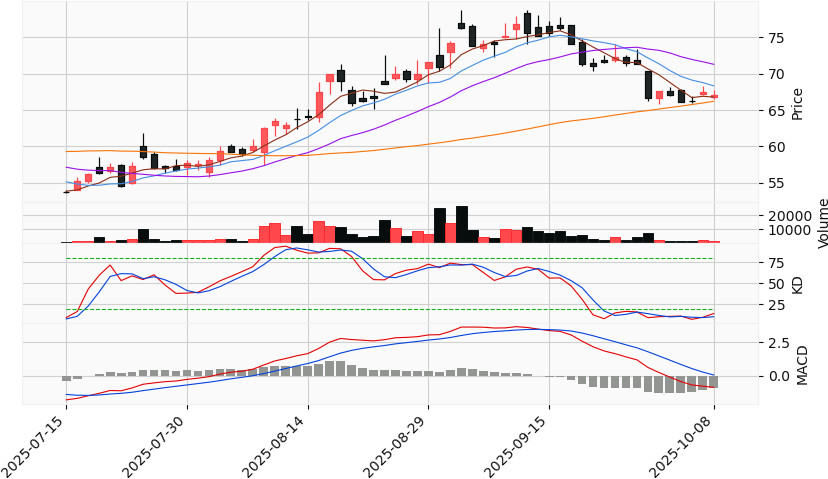

In [7]:
stock_analysis(analysis,'2464')

> **盤後**：底部反轉交易策略分析  

In [8]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-26'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-05-15']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-04-10'
    bottom_price = range_prices.loc['2025-04-10']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2025-08-15'

    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為78.10元


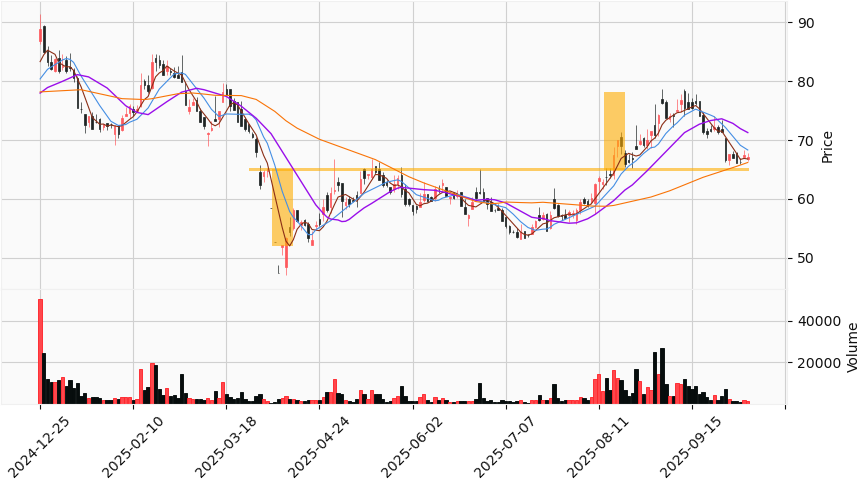

In [9]:
image = mysys.DrawOnKlineChart('2464','2024-12-25','2025-10-08',line_drawing_callback)
display(image)

籌碼面：  
法人中立(+31)：外資小買(+37)、投信中立(0)、自營小賣(-6)。  
主力中立(-11)。  
分公司買賣家數差分散(-82)。  
融資中立(+14)、融券減(-9)。  

* 南茂(8150)  
  看法：頸線與上方壓力區間盤整震盪。  

> **盤後**：量化技術分析  

解盤內容：


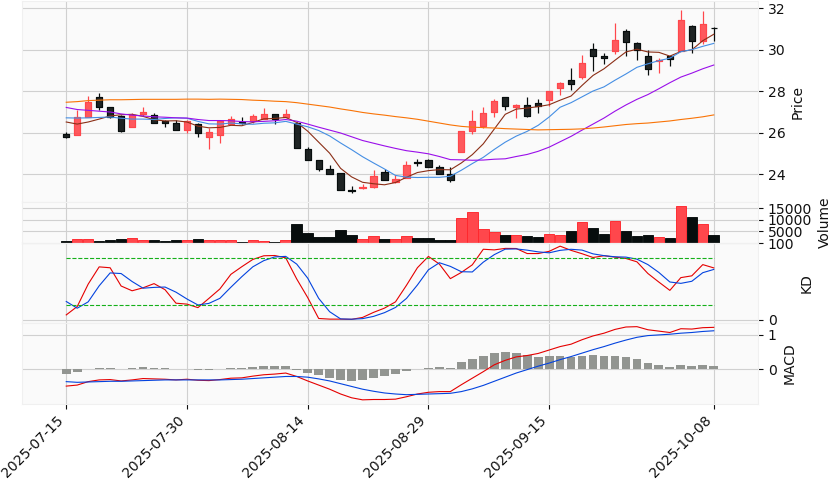

In [10]:
stock_analysis(analysis,'8150')

> **盤後**：底部反轉交易策略分析    

In [11]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-11'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-06-11']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-08-19'
    bottom_price = range_prices.loc['2025-08-19']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2025-10-02'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為36.55元


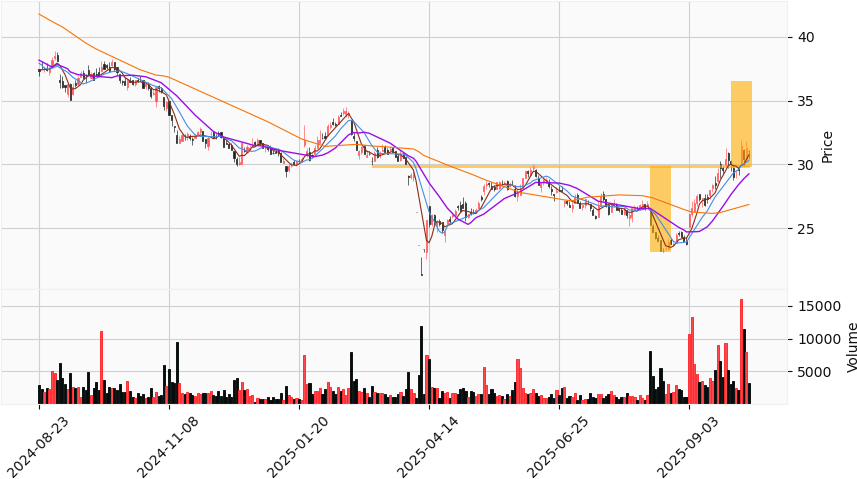

In [12]:
image = mysys.DrawOnKlineChart('8150','2024-08-23','2025-10-08',line_drawing_callback)
display(image)

籌碼面：  
法人小賣(-858)：外資小賣(-862)、投信中立(-5)、自營小買(+9)。  
主力小賣(-310)。  
分公司買賣家數差分散(-41)。  
融資中立(+4)、融券增(+27)。  